### imports

In [52]:
import pandas as pd
import numpy as np
import warnings
#warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

In [53]:
df = pd.read_csv('data/kickstarter_projects.csv')

In [54]:
df_original = df.copy

### first look / quick EDA

In [55]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [56]:
df.tail()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live
374852,1339173863,Spirits of the Forest,Games,Tabletop Games,Spain,2018-01-02 15:02:31,2018-01-26,24274,4483,82,Live


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [58]:
df.State.value_counts()


State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [59]:
df[df.State.isin(["Failed","Successful"])]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,Successful
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,Successful
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,Successful
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful


### first pre-processing / feature engineering

#### Datetime

In [60]:
df["Launched"] = pd.to_datetime(df["Launched"])
df["Deadline"] = pd.to_datetime(df["Deadline"])

In [61]:
df["lon_launched"] = df["Launched"].dt.date
df["time_launched"] = df["Launched"].dt.time
df["day_launched"] = df["Launched"].dt.weekday
df["hour"] = df["Launched"].dt.hour 

#### Feature: time of the day

In [62]:
# Transform hour into sine and cosine components
# idea: we want to capture the idea that hour = 23 is close to hour = 1 (next day): both are "around midnight"
# this would not be the case if we treated hours as a standard numerical (or categorical) variable
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

#### Feature: day of the week

In [63]:
df["weekday"] = df["day_launched"].astype("category")

#### Feature: duration (number of days)

In [64]:
df["duration"] = (df["Deadline"] - df["Launched"]).dt.days

### Data cleaning

#### clean by state

In [65]:
df.State.value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64>

We decide to drop projects that are still live (outcome unclear), suspended or canceled (reasons unclear, hypothetical outcome in case of continuation unclear).

In [66]:
df = df[df.State.isin(["Failed","Successful"])]
df.replace({"Failed":0, "Successful":1}, inplace=True)     

#### clean by duration

Note: Kickstarter reduced the upper duration limit from 90 to 60 days at some point _during_ the data collection phase (~2011). We throw out projects with a duration >60 days because this parameter choice became unavailable to projects after the change by the platform

In [67]:
df.query("duration >60").shape

(4136, 19)

In [68]:
df["duration"].unique()

array([39, 87,  8, 79, 28, 17, 29, 16, 48, 61, 65, 46, 36, 19, 35, 75, 30,
       34, 60, 27, 31, 25, 22, 55, 23, 52, 49, 80, 62,  9, 89, 72, 88, 59,
       58, 84, 32, 74, 41, 71, 51, 69, 73, 15, 21, 40, 43, 42, 57, 38, 37,
       86,  3, 20, 13, 10, 24, 66, 85, 64, 78, 54, 63, 47,  5, 83, 45, 50,
       44, 76,  7,  2,  4, 70,  6, 68, 67, 33, 56, 53, 82, 26, 77, 81, 12,
       18, 14,  1,  0, 11, 90, 91])

In [69]:
df = df.query("duration <= 60 ")
# we lose about 1% of the data

In [70]:
df.Launched.dt.year.value_counts()

Launched
2015    65266
2014    59303
2016    49092
2017    43419
2013    41084
2012    38478
2011    22465
2010     7597
2009      622
Name: count, dtype: int64

## More pre-processing / feature engineering

### Feature: goal - log scaling

Idea: account for the distribution of goal levels by applying logarithm.
To do this, we need to remove projects with a goal = 0 (also, they are not informative and there are just 3 of them)

apply log to "goal" target, turning it into a normally distributed variable
then cut off outliers (above & maybe also below)
this should cause us not to need scaling any more

In [71]:
df = df.query("Goal > 0")

In [72]:
df["goal_log"] = np.log(df['Goal'])

### Feature: goal - outlier identification

Here, we only identify the outliers. _Removal_ of the outliers comes _after_ the train-test-split.

Wikipedia on outliers:
> The interquartile range is often used to find outliers in data. Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR.

In [73]:
categories = df.Category.unique()

In [74]:
outliers = {}
outliers_log_above = {}
outliers_log_below = {}
for category in categories:
    df_temp = df.query("Category == @category")
    outliers[category] = df_temp.Goal.quantile(.75) + 1.5 * (df_temp.Goal.quantile(.75) - df_temp.Goal.quantile(.25))
    outliers_log_above[category] = df_temp.goal_log.quantile(.75) + 1.5 * (df_temp.goal_log.quantile(.75) - df_temp.goal_log.quantile(.25))
    outliers_log_below[category] = df_temp.goal_log.quantile(.25) - 1.5 * (df_temp.goal_log.quantile(.75) - df_temp.goal_log.quantile(.25))
    #print(f"cutoff for {category}: {outliers[category]}")

### A closer look / more EDA

how to success rates differ across (sub)categories?

In [75]:
df.groupby("Category").State.mean().sort_values()

Category
Technology      0.237885
Journalism      0.241860
Crafts          0.270419
Food            0.275484
Fashion         0.283134
Photography     0.340090
Publishing      0.347689
Design          0.416248
Film & Video    0.420434
Games           0.439187
Art             0.448796
Music           0.527511
Comics          0.593990
Theater         0.641687
Dance           0.655603
Name: State, dtype: float64

In [76]:
df.groupby("Subcategory").State.mean().sort_values()

Subcategory
Apps            0.071496
Web             0.102808
Mobile Games    0.106029
Video           0.132468
Food Trucks     0.137865
                  ...   
Indie Rock      0.685501
Dance           0.698157
Anthologies     0.706920
Residencies     0.735294
Chiptune        0.818182
Name: State, Length: 159, dtype: float64

In [77]:
df[['State', 'Goal', 'duration']].corr()

,State,Goal,duration
State,1.000000,-0.023722,-0.126241
Goal,-0.023722,1.000000,0.024495
duration,-0.126241,0.024495,1.000000


#### Plotting

<Axes: xlabel='count', ylabel='Country'>

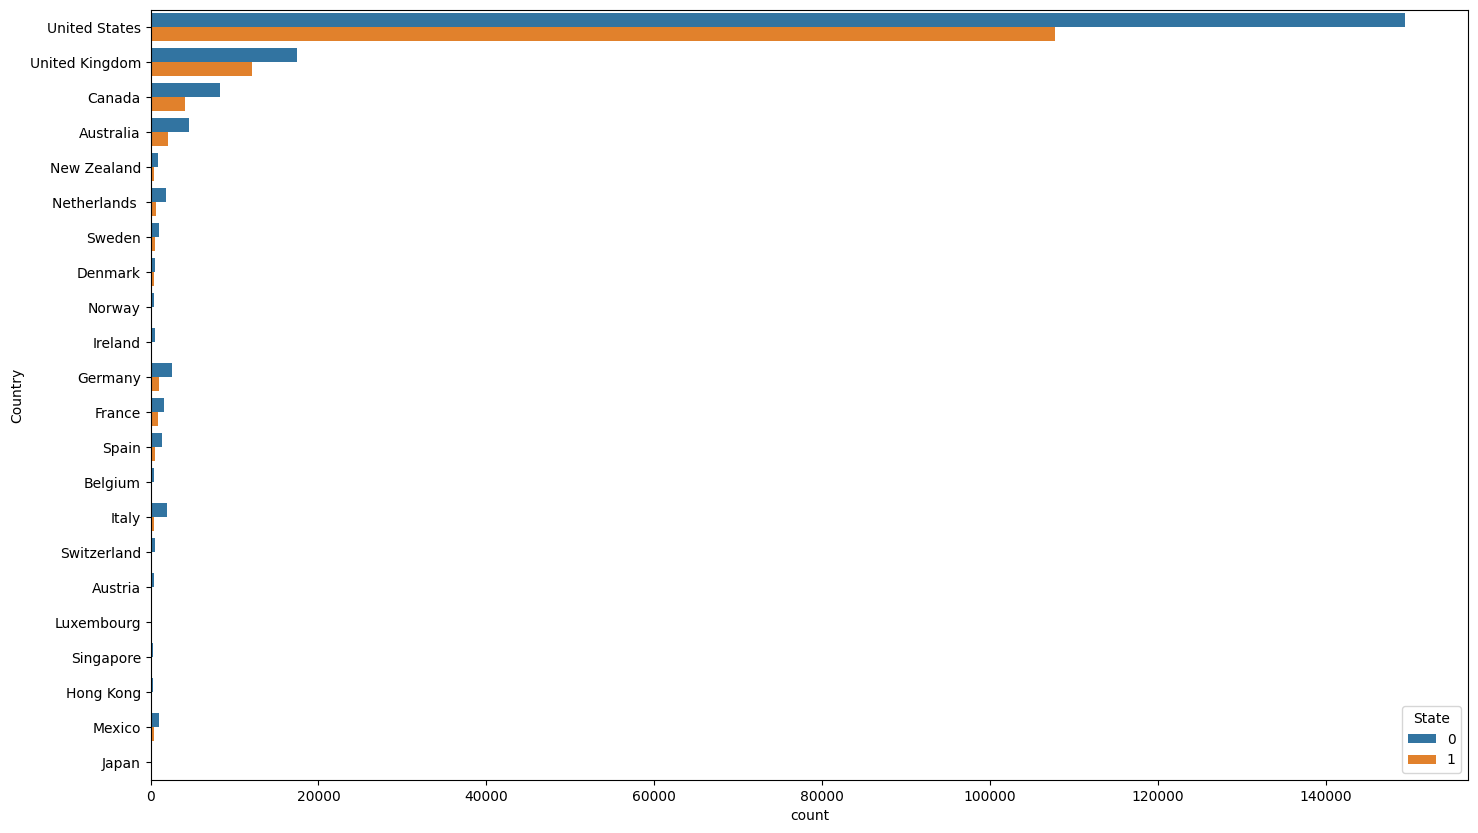

In [78]:
# by country
plt.figure(figsize=(17,10))
sns.countplot(y= df.Country , hue=df.State)

<Axes: xlabel='duration', ylabel='Count'>

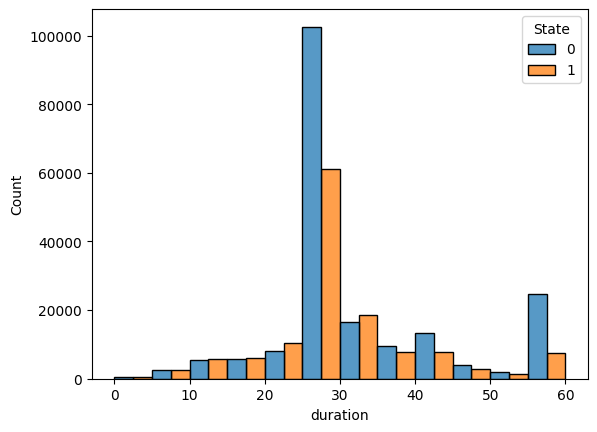

In [79]:
# by duration
sns.histplot(data = df, x="duration", hue="State", multiple="dodge", bins = 12)


<Axes: xlabel='Category', ylabel='count'>

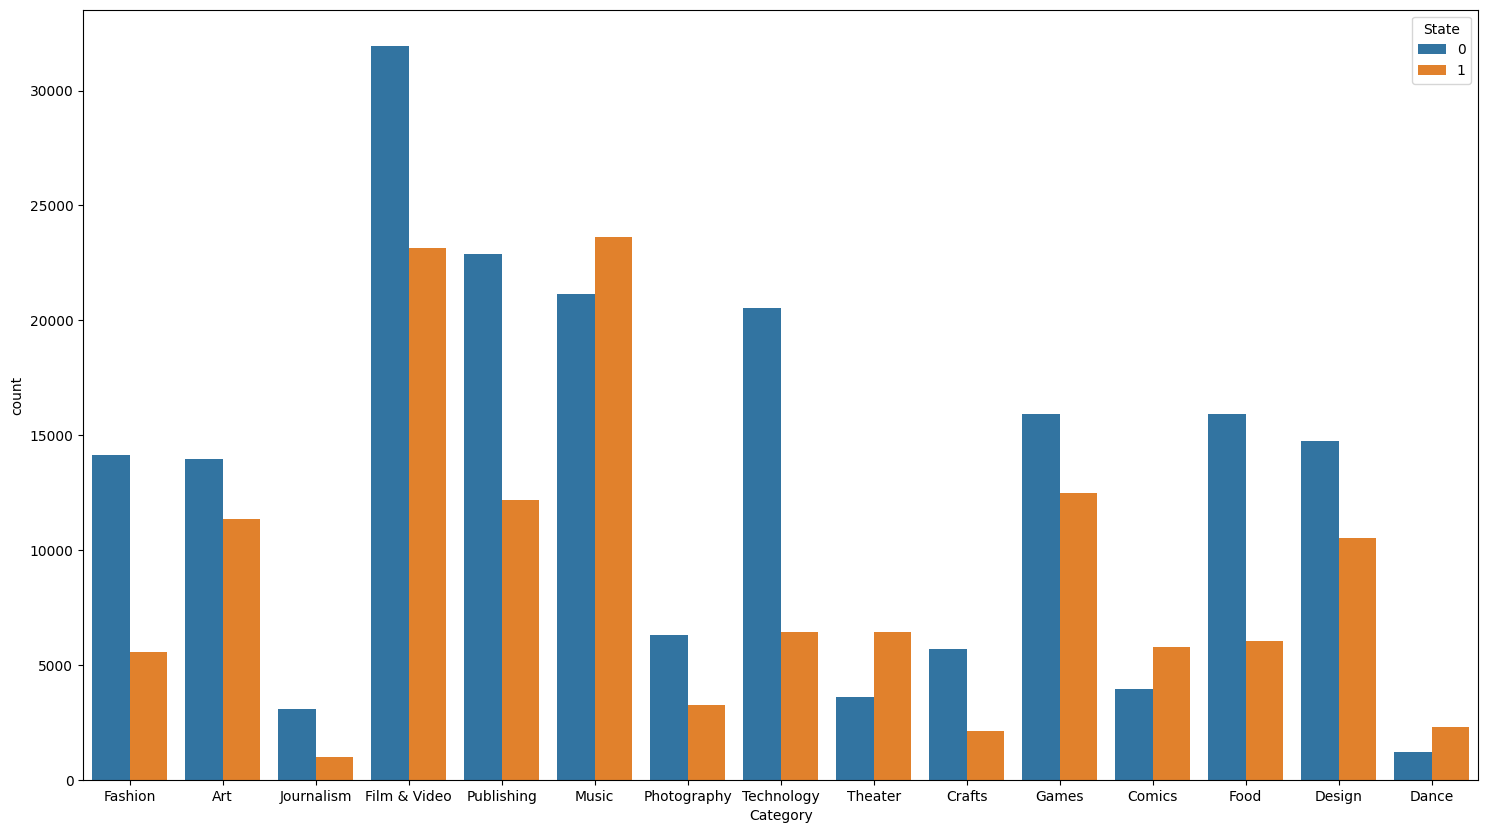

In [80]:
# by category
plt.figure(figsize=(18,10))
sns.countplot(x = df.Category , hue=df.State)

<Axes: xlabel='day_launched', ylabel='Count'>

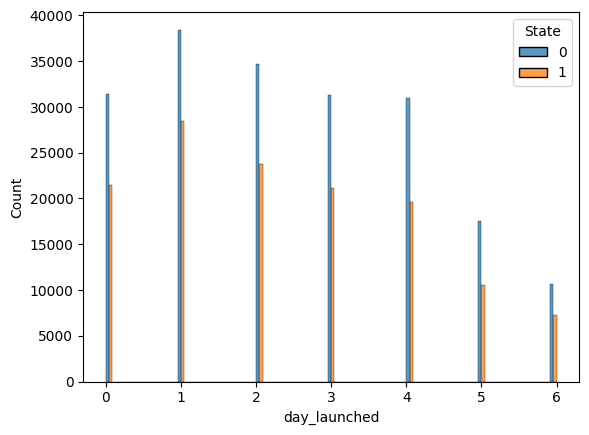

In [81]:
sns.histplot(data=df, x="day_launched", hue="State", multiple="dodge")

<Axes: title={'center': 'success rates per category'}, ylabel='Category'>

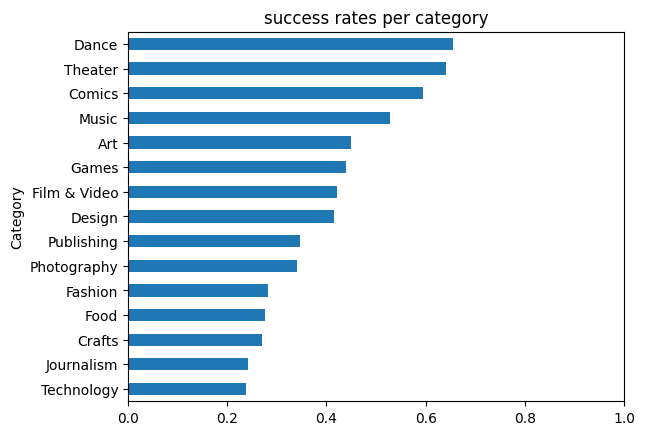

In [82]:
df.groupby("Category").State.mean().sort_values().plot(kind = "barh", xlim=[0,1], title="success rates per category")

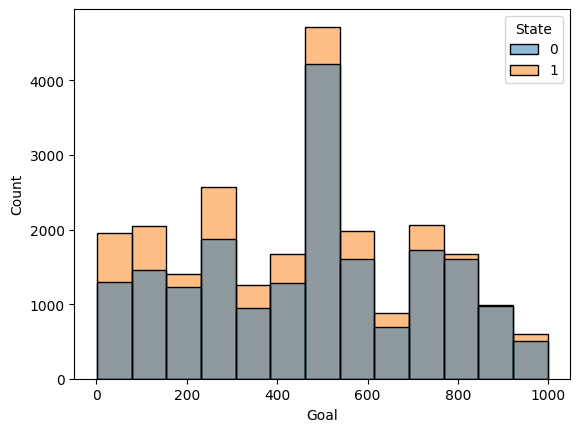

In [83]:
# by goal, with an upper limit
sns.histplot(data = df[df["Goal"] < 1000], x="Goal" , hue="State", bins=13);

<Axes: xlabel='Goal'>

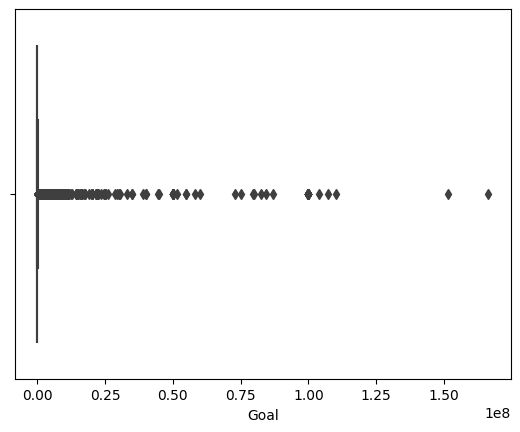

In [84]:
sns.boxplot(data = df, x = "Goal")

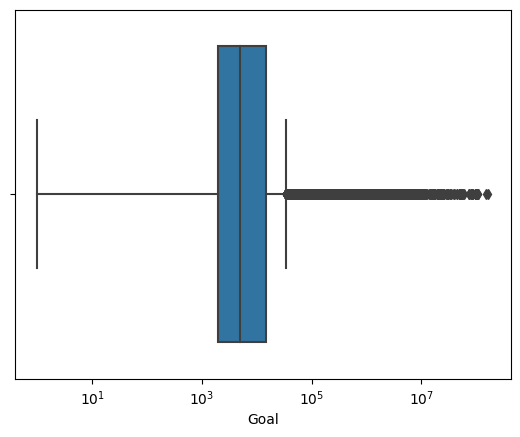

In [85]:
sns.boxplot(data = df, x = "Goal")
plt.xscale('log')

#### distribution of goals, original and log-scaled

<Axes: xlabel='Goal', ylabel='Count'>

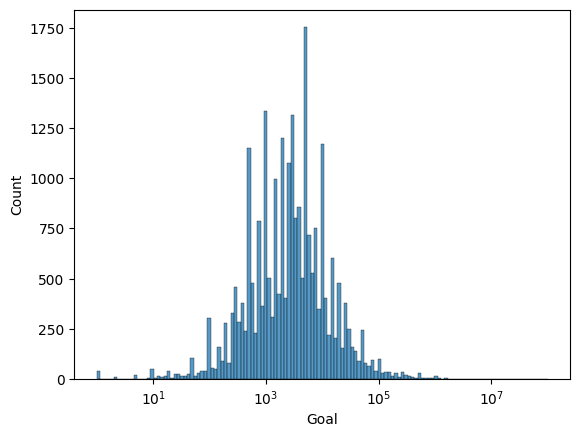

In [86]:
# log version of goal distribution for a given category 
sns.histplot(data = df.query("Category == 'Art'"), x = "Goal", log_scale = True)

<Axes: xlabel='goal_log', ylabel='Count'>

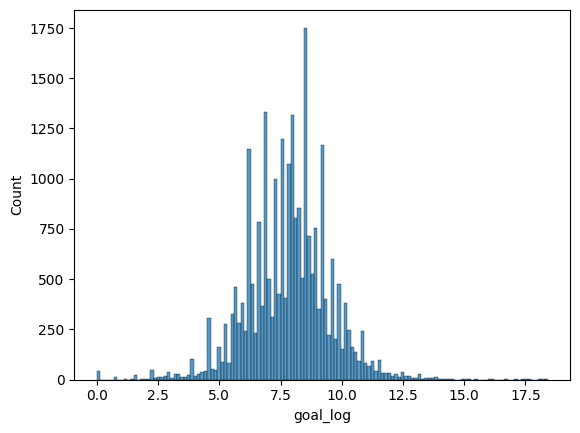

In [87]:
sns.histplot(data = df.query("Category == 'Art'"), x = "goal_log")

<Axes: ylabel='Frequency'>

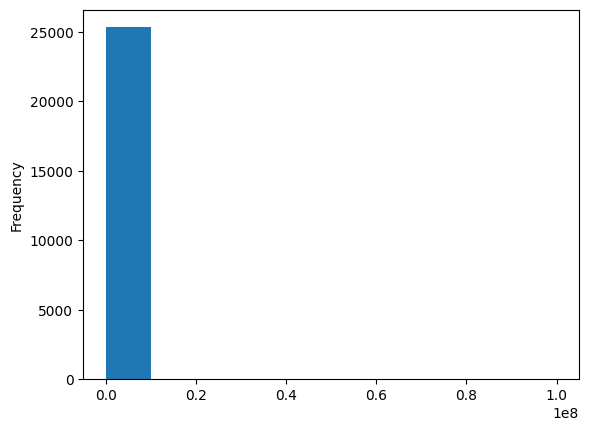

In [88]:
# non-log version of goal distribution
df.query("Category == 'Art'").Goal.plot(kind="hist")

#### EDA: outlier plotting

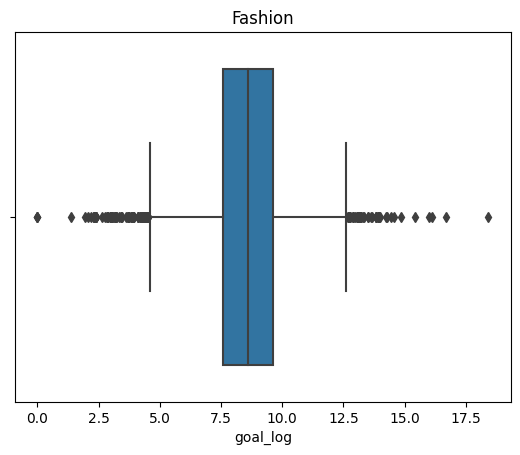

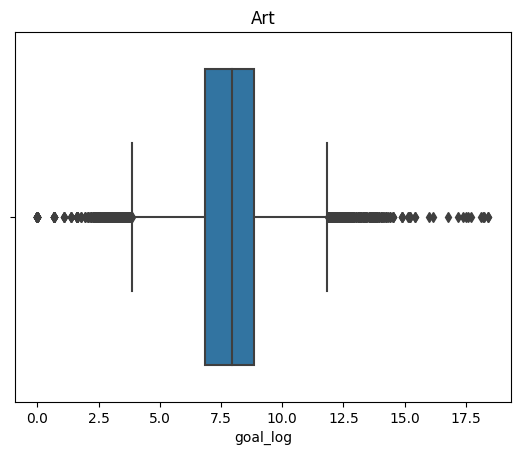

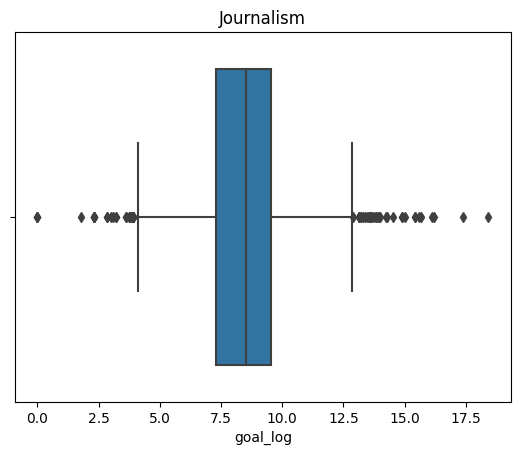

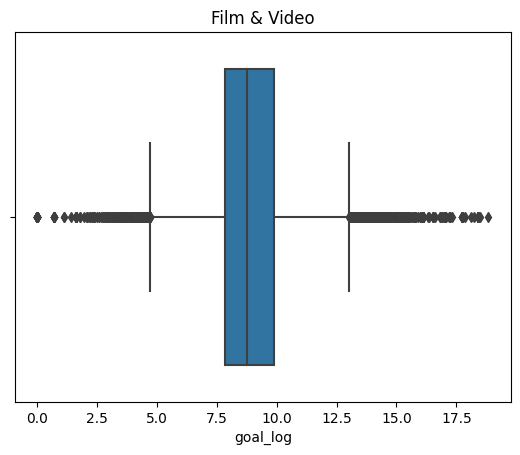

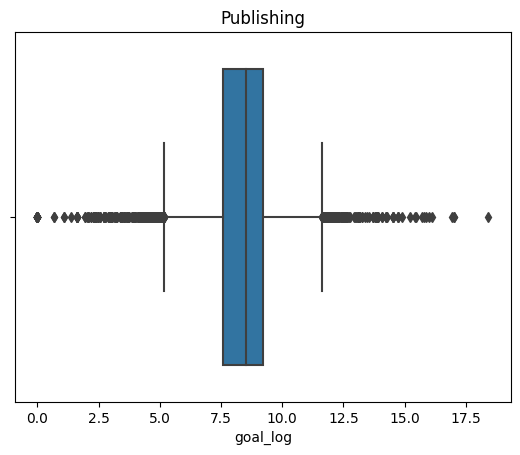

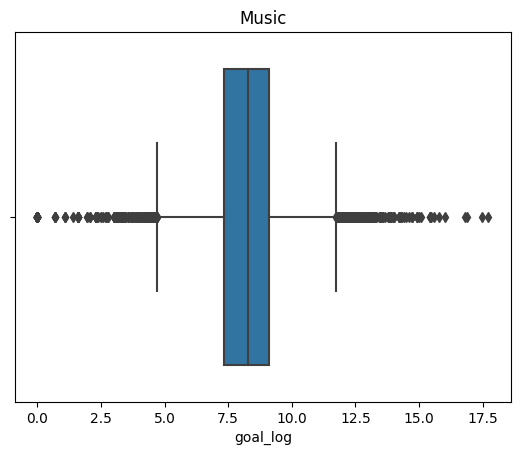

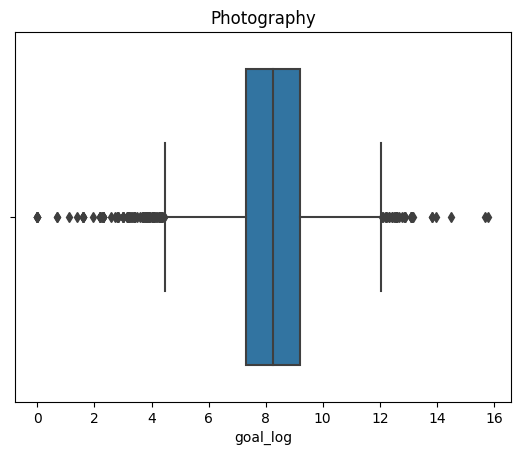

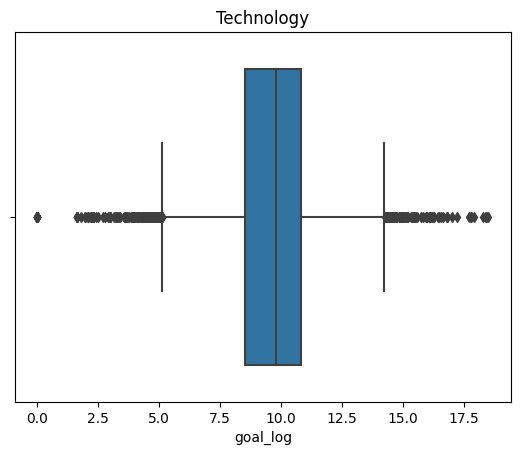

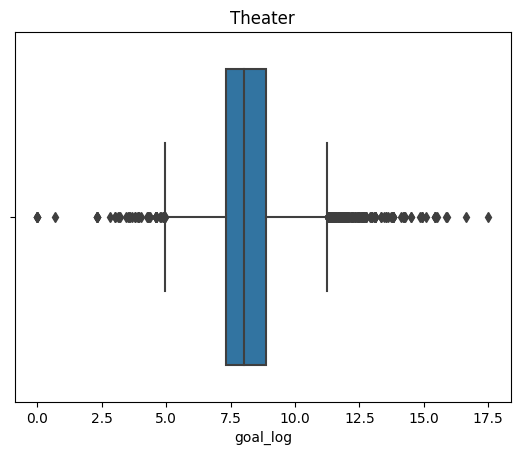

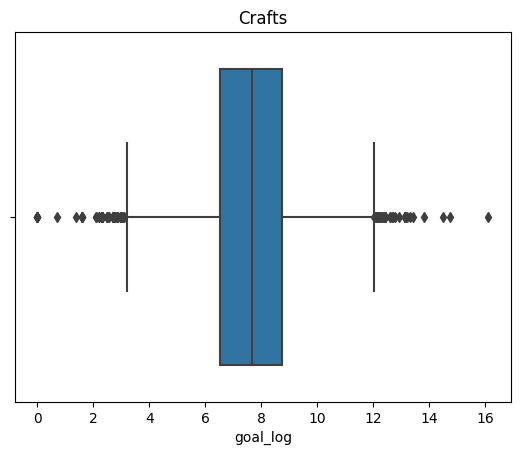

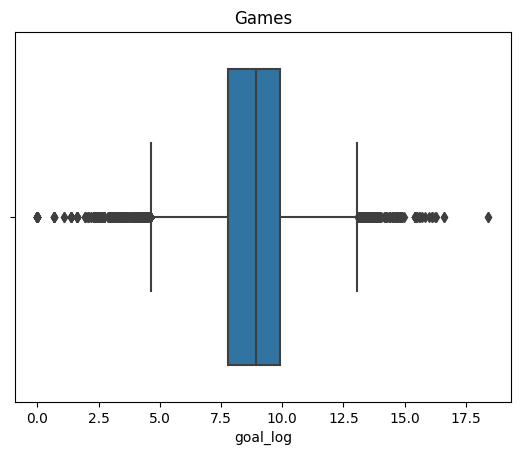

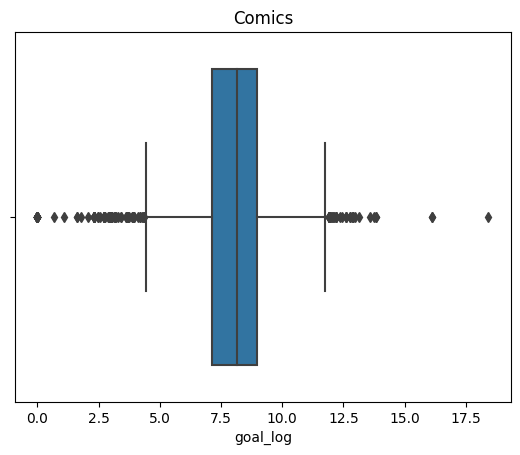

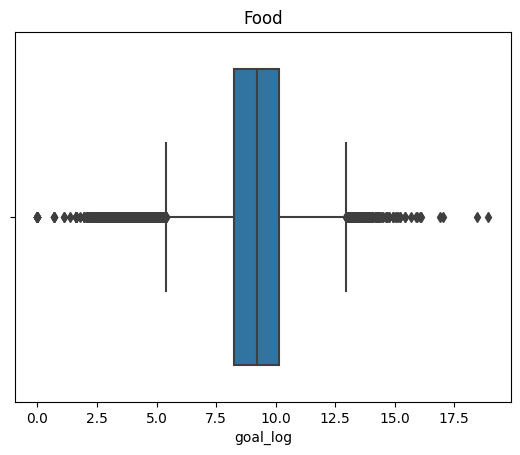

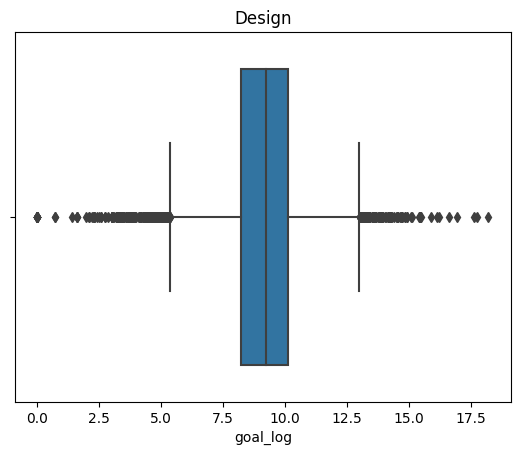

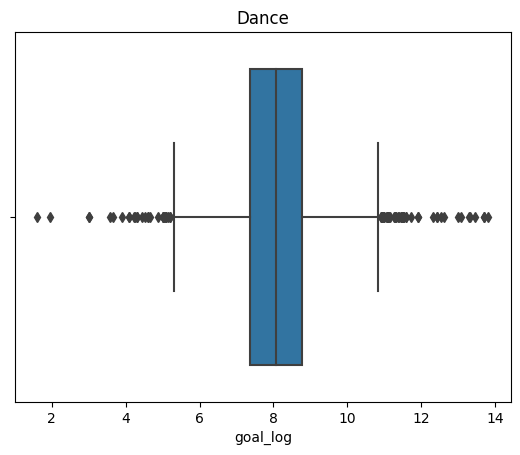

In [89]:
for category in categories:
    sns.boxplot(data = df.query('Category == @category'), x = 'goal_log')
    plt.title(category)
    plt.show()

## Creating a baseline model

### Metric
Recall, as to avoid false negatives

### Baseline Model (LOOK INTO THIS LATER- manual approach)

In [90]:
#create data frames for categories
df_film = df[df.Category.isin(["Film & Video"])]
df_music = df[df.Category.isin(["Music"])]
df_publishing = df[df.Category.isin(["Publishing"])]

<Axes: xlabel='duration', ylabel='Count'>

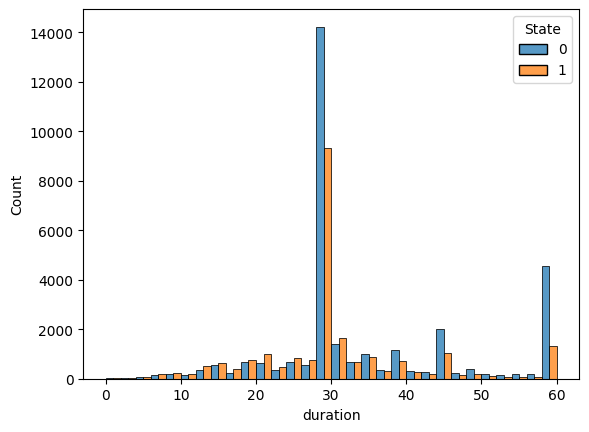

In [91]:
# plot data
sns.histplot(data=df_film,x='duration', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

<Axes: xlabel='duration', ylabel='Count'>

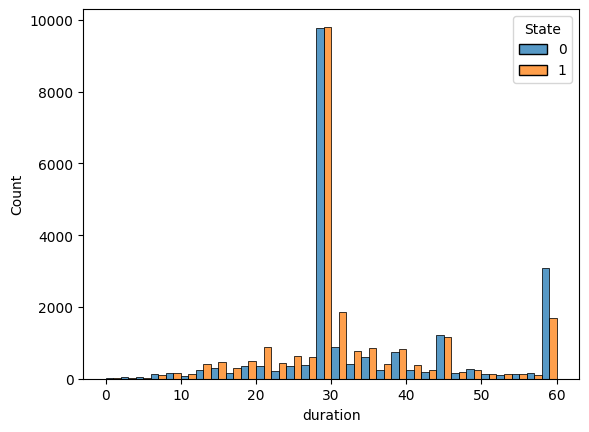

In [92]:
# plot data
sns.histplot(data=df_music,x='duration', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

<Axes: xlabel='duration', ylabel='Count'>

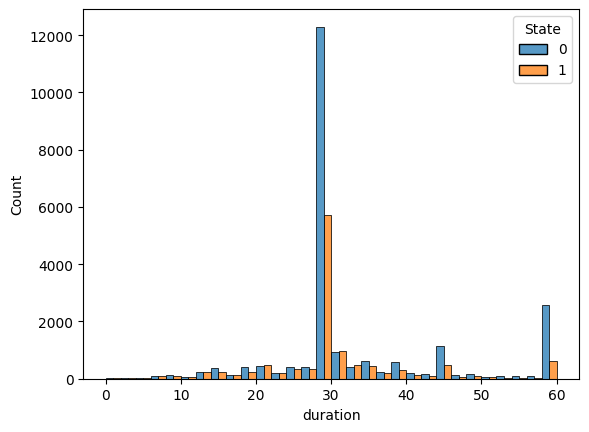

In [93]:
# plot data
sns.histplot(data=df_publishing,x='duration', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

<Axes: xlabel='Goal', ylabel='Count'>

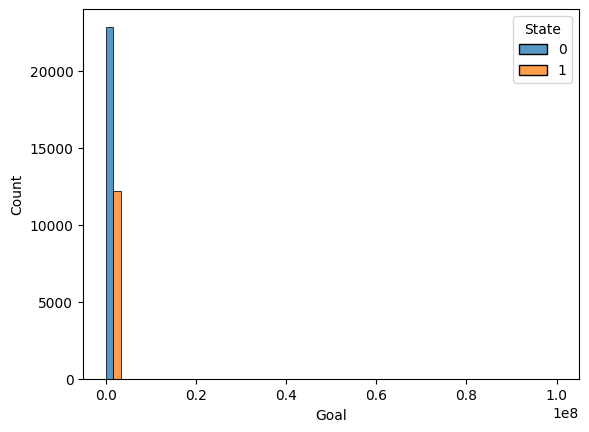

In [94]:
# plot data
sns.histplot(data=df_publishing,x='Goal', hue='State',multiple='dodge', bins=30)  #cutoff: ~29 

Set Cutoff for baseline model to 29 for all three models

## Final cleaning and feature selection

In [95]:
df.columns

Index(['ID', 'Name', 'Category', 'Subcategory', 'Country', 'Launched',
       'Deadline', 'Goal', 'Pledged', 'Backers', 'State', 'lon_launched',
       'time_launched', 'day_launched', 'hour', 'hour_sin', 'hour_cos',
       'weekday', 'duration', 'goal_log'],
      dtype='object')

In [96]:
feature_list = ["goal_log", "duration", "weekday", "hour_sin", "hour_cos"]
feature_list_reduced = ["goal_log", "duration"]#, "weekday", "hour_sin", "hour_cos"]

In [97]:
df[feature_list]

,goal_log,duration,weekday,hour_sin,hour_cos
0,6.907755,39,1,-0.707107,0.707107
2,2.995732,8,4,-0.707107,0.707107
4,7.549609,28,0,-0.500000,-0.866025
5,8.006368,17,1,-0.258819,-0.965926
6,5.298317,29,2,0.500000,0.866025
...,...,...,...,...,...
374310,3.583519,2,5,0.500000,-0.866025
374400,5.602119,4,1,-0.258819,-0.965926
374458,5.298317,3,2,0.707107,0.707107
374530,5.521461,1,3,0.258819,0.965926


## Splitting the data

In [98]:
X = {}
Y = {}
for category in categories:
    df_temp = df[df.Category.isin([category])]
    X[category] = df_temp[feature_list]
    #X[category] = df_temp[.drop(columns='State')]
    Y[category] = df_temp.State

In [99]:
X_train = {}
X_test = {}
y_train = {}
y_test = {} 
for category in categories:
    X_train[category], X_test[category], y_train[category], y_test[category] = train_test_split(X[category], Y[category], test_size=0.20, random_state=42, shuffle=True, stratify=Y[category])
    # note: added shuffling (to account for ordered date within categories) and stratification (so that successful and failed projects have same share across test, train, and full data)

## Baseline model

In [100]:
y_baseline = {}
for category in categories:
    y_baseline[category] = X_test[category].duration.apply(lambda x:0 if x  > 29 else 1).values

In [101]:
recall_baseline = {}
for category in categories:
    recall_baseline[category] = recall_score(y_test[category], y_baseline[category], average='binary')  # Adjust 'average' as needed
    print(f"recall for category {category}: {recall_baseline[category]}")

recall for category Fashion: 0.6684587813620072
recall for category Art: 0.7392260334212841
recall for category Journalism: 0.702020202020202
recall for category Film & Video: 0.657167530224525
recall for category Publishing: 0.6709016393442623
recall for category Music: 0.6313227513227513
recall for category Photography: 0.6466049382716049
recall for category Technology: 0.5518316445830086
recall for category Theater: 0.6926070038910506
recall for category Crafts: 0.7772511848341233
recall for category Games: 0.6924309171005206
recall for category Comics: 0.6773080241587576
recall for category Food: 0.6867768595041323
recall for category Design: 0.5515439429928741
recall for category Dance: 0.6645021645021645


## Final cleaning + exploration: Outlier removal

We have identified the outliers BEFORE the split but do the removal AFTER the split.
Removing AFTER splitting is essential; we are not sure whether the identification should be before or after splitting or whether it doesn't matter. We leave it as it is.

In [102]:
df_train_wo_outlier = {}
y_train_wo_outlier = {}
X_train_wo_outlier = {}
for category in categories:
    df_train_wo_outlier[category] = X_train[category][(outliers_log_below[category] <= X_train[category].goal_log) & (X_train[category].goal_log <= outliers_log_above[category])]
    df_train_wo_outlier[category] = pd.merge(df_train_wo_outlier[category], y_train[category], left_index=True, right_index=True)
    y_train_wo_outlier[category] = df_train_wo_outlier[category]['State']
    X_train_wo_outlier[category] = df_train_wo_outlier[category].drop('State', axis=1)

#### data exploration AFTER outlier removal

<Axes: xlabel='goal_log', ylabel='Count'>

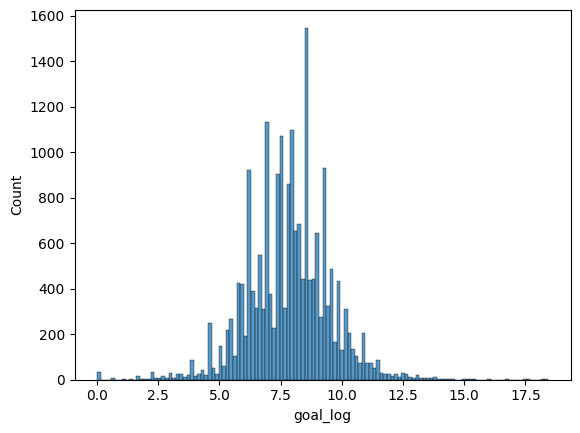

In [103]:
# BEFORE removal
sns.histplot(data = X_train["Art"], x = "goal_log")

<Axes: xlabel='goal_log', ylabel='Count'>

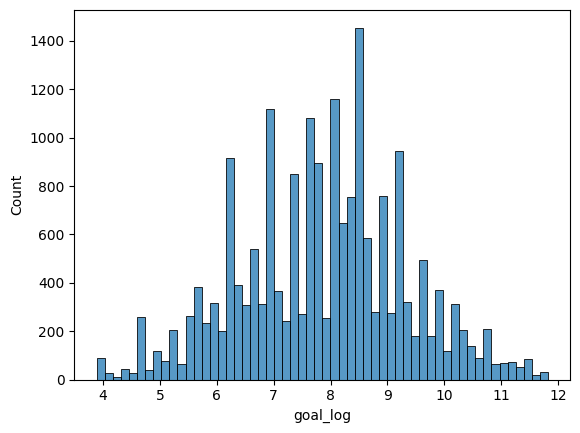

In [104]:
# AFTER removal
sns.histplot(data = X_train_wo_outlier["Art"], x = "goal_log")

## NEW

NOTE: additional changes _above_ this point: modified the train test split:
- added shuffling (to account for ordered date within categories) 
- added stratification (so that successful and failed projects have same share across test, train, and full data)

In [131]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, make_scorer
#from imblearn.under_sampling import RandomUnderSampler


In [110]:
# we create dictionaries OF DICTIONARIES:
# goal: have e.g. y_pred for each model (level 1 of the dict) and within each model, for each category (level 2)
# we can then access e.g. y_pred[level 1: model = logistic with polynomial][level 2: category = Art]
#
# TRANSFORMERS & MODELS
models = {}
polynomial_features = {}
scalers = {}
#
# DATA
x_train_poly = {}
x_test_poly = {}
x_train_scaled = {}
x_test_scaled = {}
x_train_transformed = {} # for data transformation with scaling AND polynomials
x_test_transformed = {} # for data transformation with scaling AND polynomials
y_pred_train = {}
y_pred_test = {}
#
# METRICS
recalls_train = {}
recalls_test = {}
df_recalls = {}
f1_train = {}
f1_test = {}
df_f1 = {}

In [107]:
features_to_scale = ["goal_log", "duration"]

### Logistic base: no polynomials, no scaling

In [163]:
model = "log_noPoly_noScale"
#
models[model] = {}
y_pred_train[model] = {}
y_pred_test[model] = {}
#
recalls_train[model] = {}
recalls_test[model] = {}

f1_train[model] = {}
f1_test[model] = {}

recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)

#
for category in categories:
    models[model][category] = LogisticRegression()
    models[model][category].fit(X_train_wo_outlier[category], y_train_wo_outlier[category])

     # Perform cross-validation
    cv_recall_scores = cross_val_score(
        models[model][category],
        X_train_wo_outlier[category],
        y_train_wo_outlier[category],
        scoring=recall_scorer,
        cv=5  # 5-fold cross-validation
    )

    print(f"Cross-validated Recall for {category}: {cv_recall_scores.mean()}")
# Perform cross-validation for F1 score
    cv_f1_scores = cross_val_score(
        models[model][category],
        X_train_wo_outlier[category],
        y_train_wo_outlier[category],
        scoring=f1_scorer,
        cv=5  # 5-fold cross-validation
    )
    print(f"Cross-validated Recall for {category}: {cv_f1_scores.mean()}")

    #
    y_pred_train[model][category] = models[model][category].predict(X_train_wo_outlier[category])
    y_pred_test[model][category] = models[model][category].predict(X_test[category])
    #
    recalls_train[model][category] = recall_score(y_train_wo_outlier[category], y_pred_train[model][category]).round(4)
    recalls_test[model][category] = recall_score(y_test[category], y_pred_test[model][category]).round(4)

    f1_train[model][category] = f1_score(y_train_wo_outlier[category], y_pred_train[model][category]).round(4)
    f1_test[model][category] = recall_score(y_test[category], y_pred_test[model][category]).round(4)

    # Confusion matrix for the current category
    cm = confusion_matrix(y_train_wo_outlier[category], y_pred_train[model][category])
    print(f"Confusion Matrix for {category}:\n{cm}")

#
df_recalls[model] = pd.DataFrame({
    "category": categories,
    "Recall train": recalls_train[model].values(),
    "Recall test": recalls_test[model].values(),
    "F1 train": f1_train[model].values(),
    "F1 test": f1_test[model].values()
})
df_recalls[model]


Cross-validated Recall for Fashion: 0.009992260860592302
Cross-validated Recall for Fashion: 0.019517750097084893
Confusion Matrix for Fashion:
[[11162    55]
 [ 4364    40]]
Cross-validated Recall for Art: 0.41608784297137263
Cross-validated Recall for Art: 0.4786024703922669
Confusion Matrix for Art:
[[7976 2876]
 [5200 3714]]
Cross-validated Recall for Journalism: 0.010281224152191893
Cross-validated Recall for Journalism: 0.01998820223046012
Confusion Matrix for Journalism:
[[2432   10]
 [ 769    8]]
Cross-validated Recall for Film & Video: 0.36564775573497393
Cross-validated Recall for Film & Video: 0.4420160805278493
Confusion Matrix for Film & Video:
[[19628  5254]
 [11574  6684]]
Cross-validated Recall for Publishing: 0.1684841507922503
Cross-validated Recall for Publishing: 0.2565248737268898
Confusion Matrix for Publishing:
[[16549  1371]
 [ 7847  1602]]
Cross-validated Recall for Music: 0.7105950607048561
Cross-validated Recall for Music: 0.6418495936985372
Confusion Matrix 

,category,Recall train,Recall test,F1 train,F1 test
0,Fashion,0.0091,0.0224,0.0178,0.0224
1,Art,0.4166,0.4389,0.4791,0.4389
2,Journalism,0.0103,0.0455,0.0201,0.0455
3,Film & Video,0.3661,0.3789,0.4427,0.3789
4,Publishing,0.1695,0.1783,0.2579,0.1783
5,Music,0.7116,0.7297,0.6425,0.7297
6,Photography,0.0779,0.1049,0.1376,0.1049
7,Technology,0.0192,0.0460,0.0369,0.0460
8,Theater,0.9337,0.9339,0.7977,0.9339
9,Crafts,0.1464,0.1706,0.2331,0.1706


In [164]:
y_train_wo_outlier["Dance"].value_counts()

State
1    1837
0     917
Name: count, dtype: int64

In [165]:
1837+971

2808

In [167]:
64 + 853 +21 + 1816


2754

(TN + FP + FN + TP)

In [ ]:
483  + 434 +612 + 1225  

2754

In [ ]:
...

Note: the confusion matrices show that some of the minority class are being skipped

In [ ]:
cm = confusion_matrix(y_train_wo_outlier[category],y_pred_train[category])

KeyError: 'Dance'

Note: the models perform very well on the categories where success is very likely but very bad for categories with low success.

In [ ]:
model = "log_noPoly_noScale"
#
models[model] = {}
y_pred_train[model] = {}
y_pred_test[model] = {}
#
recalls_train[model] = {}
recalls_test[model] = {}

f1_train[model] = {}
f1_test[model] = {}
#
for category in categories:
    models[model][category] = LogisticRegression(class_weight="balanced")
    models[model][category].fit(X_train_wo_outlier[category], y_train_wo_outlier[category])

     # Perform cross-validation
    cv_recall_scores = cross_val_score(
        models[model][category],
        X_train_wo_outlier[category],
        y_train_wo_outlier[category],
        scoring=recall_scorer,
        cv=5  # 5-fold cross-validation
    )

    print(f"Cross-validated Recall for {category}: {cv_recall_scores.mean()}")
# Perform cross-validation for F1 score
    cv_f1_scores = cross_val_score(
        models[model][category],
        X_train_wo_outlier[category],
        y_train_wo_outlier[category],
        scoring=f1_scorer,
        cv=5  # 5-fold cross-validation
    )
    print(f"Cross-validated F1 for {category}: {cv_f1_scores.mean()}")
    #
    y_pred_train[model][category] = models[model][category].predict(X_train_wo_outlier[category])
    y_pred_test[model][category] = models[model][category].predict(X_test[category])
    #
    recalls_train[model][category] = recall_score(y_train_wo_outlier[category], y_pred_train[model][category]).round(4)
    recalls_test[model][category] = recall_score(y_test[category], y_pred_test[model][category]).round(4)

    f1_train[model][category] = f1_score(y_train_wo_outlier[category], y_pred_train[model][category]).round(4)
    f1_test[model][category] = recall_score(y_test[category], y_pred_test[model][category]).round(4)
#
df_recalls[model] = pd.DataFrame({
    "category": categories,
    "Recall train": recalls_train[model].values(),
    "Recall test": recalls_test[model].values(),
    "F1 train": f1_train[model].values(),
    "F1 test": f1_test[model].values()
})
df_recalls[model]

Cross-validated Recall for Fashion: 0.5742469817356309
Cross-validated F1 for Fashion: 0.43427643230565405
Cross-validated Recall for Art: 0.5864939669015198
Cross-validated F1 for Art: 0.5666559855102835
Cross-validated Recall for Journalism: 0.5817700578990902
Cross-validated F1 for Journalism: 0.402791350047757
Cross-validated Recall for Film & Video: 0.6143065426717703
Cross-validated F1 for Film & Video: 0.5696792062949554
Cross-validated Recall for Publishing: 0.5907500679231754
Cross-validated F1 for Publishing: 0.5058521810792761
Cross-validated Recall for Music: 0.5669649266896541
Cross-validated F1 for Music: 0.5790258276986456
Cross-validated Recall for Photography: 0.5540661788592731
Cross-validated F1 for Photography: 0.466622952227699
Cross-validated Recall for Technology: 0.6091542457542457
Cross-validated F1 for Technology: 0.41887430574391005
Cross-validated Recall for Theater: 0.6170353982300885
Cross-validated F1 for Theater: 0.6760058511792089
Cross-validated Recall

,category,Recall train,Recall test,F1 train,F1 test
0,Fashion,0.5754,0.5896,0.4346,0.5896
1,Art,0.5877,0.6069,0.5679,0.6069
2,Journalism,0.5869,0.6162,0.4070,0.6162
3,Film & Video,0.6140,0.6159,0.5698,0.6159
4,Publishing,0.5919,0.5885,0.5068,0.5885
5,Music,0.5675,0.5939,0.5796,0.5939
6,Photography,0.5552,0.5463,0.4672,0.5463
7,Technology,0.6078,0.6033,0.4176,0.6033
8,Theater,0.6192,0.6156,0.6774,0.6156
9,Crafts,0.6364,0.6280,0.4829,0.6280


After balancing, the models perform all equally moderate.

### Logistic: with polynomials degree 2, no scaling

NOTE: this also creates polynomials for weekday, hours, etc. - does not make sense!!

note: the output asks us to either increase the number of iterations (which doesn't improve anything) or to add scaling (which we try next)

In [168]:
model = "log_Poly2_noScale"
#
models[model] = {}
polynomial_features[model] = {}
#
x_train_poly[model] = {}
x_test_poly[model] = {}
x_train_scaled[model] = {}
x_test_scaled[model] = {}
x_train_transformed[model] = {}
x_test_transformed[model] = {}
#
y_pred_train[model] = {}
y_pred_test[model] = {}
#
recalls_train[model] = {}
recalls_test[model] = {}
#
#
for category in categories:
    #
    # transformation 1: polynomials
    # here: degree 2
    polynomial_features[model][category] = PolynomialFeatures(degree=2, include_bias=False)
    x_train_poly[model][category] = polynomial_features[model][category].fit_transform(X_train_wo_outlier[category])
    x_test_poly[model][category] = polynomial_features[model][category].transform(X_test[category])
    #
    # transformation 2: scaling
    # here: none
    x_train_scaled[model][category] = x_train_poly[model][category]
    x_test_scaled[model][category] = x_test_poly[model][category]
    #
    # transformation: final
    x_train_transformed[model][category] = x_train_scaled[model][category]
    x_test_transformed[model][category] = x_test_scaled[model][category]
    #
    # regression
    models[model][category] = LogisticRegression(class_weight="balanced")
    models[model][category].fit(x_train_transformed[model][category], y_train_wo_outlier[category])

# Perform cross-validation
    cv_recall_scores = cross_val_score(
        models[model][category],
        x_train_transformed[model][category],
        y_train_wo_outlier[category],
        scoring=recall_scorer,
        cv=5  # 5-fold cross-validation
    )

    print(f"Cross-validated Recall for {category}: {cv_recall_scores.mean()}")
# Perform cross-validation for F1 score
    cv_f1_scores = cross_val_score(
        models[model][category],
        x_train_transformed[model][category],
        y_train_wo_outlier[category],
        scoring=f1_scorer,
        cv=5  # 5-fold cross-validation
    )
    print(f"Cross-validated F1 for {category}: {cv_f1_scores.mean()}")


    #
    y_pred_train[model][category] = models[model][category].predict(x_train_transformed[model][category])
    y_pred_test[model][category] = models[model][category].predict(x_test_transformed[model][category])
    #
    recalls_train[model][category] = recall_score(y_train_wo_outlier[category], y_pred_train[model][category])
    recalls_test[model][category] = recall_score(y_test[category], y_pred_test[model][category])

        # Confusion matrix for the current category
    cm = confusion_matrix(y_train_wo_outlier[category], y_pred_train[model][category])
    print(f"Confusion Matrix for {category}:\n{cm}")
#
df_recalls[model] = pd.DataFrame({
    "category": categories,
    "Recall train": recalls_train[model].values(),
    "Recall test": recalls_test[model].values()
})
df_recalls[model]

Cross-validated Recall for Fashion: 0.6146695387472912
Cross-validated F1 for Fashion: 0.44280615371079135
Confusion Matrix for Fashion:
[[6164 5053]
 [1694 2710]]
Cross-validated Recall for Art: 0.634957791286077
Cross-validated F1 for Art: 0.5820105980292797
Confusion Matrix for Art:
[[5958 4894]
 [3138 5776]]
Cross-validated Recall for Journalism: 0.6088089330024814
Cross-validated F1 for Journalism: 0.4064006301713431
Confusion Matrix for Journalism:
[[1394 1048]
 [ 295  482]]
Cross-validated Recall for Film & Video: 0.6771285185561849
Cross-validated F1 for Film & Video: 0.5899118942622075
Confusion Matrix for Film & Video:
[[13527 11355]
 [ 5807 12451]]
Cross-validated Recall for Publishing: 0.6309656294727761
Cross-validated F1 for Publishing: 0.5174044221672424
Confusion Matrix for Publishing:
[[10248  7672]
 [ 3480  5969]]
Cross-validated Recall for Music: 0.6311162264656109
Cross-validated F1 for Music: 0.6109815872352732
Confusion Matrix for Music:
[[ 8496  8079]
 [ 6861 117

,category,Recall train,Recall test
0,Fashion,0.615350,0.628136
1,Art,0.647969,0.666227
2,Journalism,0.620335,0.595960
3,Film & Video,0.681948,0.691494
4,Publishing,0.631707,0.637295
5,Music,0.632295,0.655450
6,Photography,0.599685,0.584877
7,Technology,0.651539,0.643024
8,Theater,0.678403,0.673930
9,Crafts,0.661827,0.670616


In [151]:
df_recalls[model]["Recall test"].mean()

0.6508140678818538

3 degrees:

In [153]:
model = "log_Poly2_noScale"
#
models[model] = {}
polynomial_features[model] = {}
#
x_train_poly[model] = {}
x_test_poly[model] = {}
x_train_scaled[model] = {}
x_test_scaled[model] = {}
x_train_transformed[model] = {}
x_test_transformed[model] = {}
#
y_pred_train[model] = {}
y_pred_test[model] = {}
#
recalls_train[model] = {}
recalls_test[model] = {}
#
#
for category in categories:
    #
    # transformation 1: polynomials
    # here: degree 2
    polynomial_features[model][category] = PolynomialFeatures(degree=3, include_bias=False)
    x_train_poly[model][category] = polynomial_features[model][category].fit_transform(X_train_wo_outlier[category])
    x_test_poly[model][category] = polynomial_features[model][category].transform(X_test[category])
    #
    # transformation 2: scaling
    # here: none
    x_train_scaled[model][category] = x_train_poly[model][category]
    x_test_scaled[model][category] = x_test_poly[model][category]
    #
    # transformation: final
    x_train_transformed[model][category] = x_train_scaled[model][category]
    x_test_transformed[model][category] = x_test_scaled[model][category]
    #
    # regression
    models[model][category] = LogisticRegression(class_weight="balanced")
    models[model][category].fit(x_train_transformed[model][category], y_train_wo_outlier[category])

# Perform cross-validation
    cv_recall_scores = cross_val_score(
        models[model][category],
        x_train_transformed[model][category],
        y_train_wo_outlier[category],
        scoring=recall_scorer,
        cv=5  # 5-fold cross-validation
    )

    print(f"Cross-validated Recall for {category}: {cv_recall_scores.mean()}")
# Perform cross-validation for F1 score
    cv_f1_scores = cross_val_score(
        models[model][category],
        x_train_transformed[model][category],
        y_train_wo_outlier[category],
        scoring=f1_scorer,
        cv=5  # 5-fold cross-validation
    )
    print(f"Cross-validated F1 for {category}: {cv_f1_scores.mean()}")


    #
    y_pred_train[model][category] = models[model][category].predict(x_train_transformed[model][category])
    y_pred_test[model][category] = models[model][category].predict(x_test_transformed[model][category])
    #
    recalls_train[model][category] = recall_score(y_train_wo_outlier[category], y_pred_train[model][category])
    recalls_test[model][category] = recall_score(y_test[category], y_pred_test[model][category])
#
df_recalls[model] = pd.DataFrame({
    "category": categories,
    "Recall train": recalls_train[model].values(),
    "Recall test": recalls_test[model].values()
})
df_recalls[model]


Cross-validated Recall for Fashion: 0.6187527086987927
Cross-validated F1 for Fashion: 0.44035151533083167
Cross-validated Recall for Art: 0.5884014948512986
Cross-validated F1 for Art: 0.5580300022423679
Cross-validated Recall for Journalism: 0.5804880066170389
Cross-validated F1 for Journalism: 0.39350958015496784
Cross-validated Recall for Film & Video: 0.6366539887794999
Cross-validated F1 for Film & Video: 0.5706488801250992
Cross-validated Recall for Publishing: 0.6062010357934128
Cross-validated F1 for Publishing: 0.5056888902054282
Cross-validated Recall for Music: 0.6098396362218808
Cross-validated F1 for Music: 0.5984577079819426
Cross-validated Recall for Photography: 0.5902425629998607
Cross-validated F1 for Photography: 0.47616140584195543
Cross-validated Recall for Technology: 0.6621394605394604
Cross-validated F1 for Technology: 0.43141801632287946
Cross-validated Recall for Theater: 0.6146729999458034
Cross-validated F1 for Theater: 0.6710526564039339
Cross-validated Re

,category,Recall train,Recall test
0,Fashion,0.609219,0.629928
1,Art,0.586830,0.605101
2,Journalism,0.592021,0.560606
3,Film & Video,0.658506,0.674655
4,Publishing,0.605461,0.609836
5,Music,0.590278,0.606772
6,Photography,0.590641,0.584877
7,Technology,0.663335,0.653936
8,Theater,0.633360,0.620233
9,Crafts,0.641863,0.654028


In [154]:
df_recalls[model]["Recall test"].mean()

0.6309813308611486

Note: The mean recall score was better (0.65 vs. 0.63) for the polynomial model to 2nd degree than 3rd degree.

### Logistic: no polynomials, with Standard Scaler

In [144]:
model = "log_noPoly_StandardScale"
#
models[model] = {}
#polynomial_features[model] = {}
scalers[model] = {}
#
x_train_poly[model] = {}
x_test_poly[model] = {}
x_train_scaled[model] = {}
x_test_scaled[model] = {}
x_train_transformed[model] = {}
x_test_transformed[model] = {}
#
y_pred_train[model] = {}
y_pred_test[model] = {}
#
recalls_train[model] = {}
recalls_test[model] = {}
#
#
for category in categories:
    #
    # transformation 1: polynomials
    # here: none
    x_train_poly[model][category] = X_train_wo_outlier[category]
    x_test_poly[model][category] = X_test[category]
    #
    # transformation 2: scaling
    # here: StandardScaler
    scalers[model][category] = StandardScaler()
    # scale only columns/features to be scaled, not all!
    x_train_scaled[model][category] = scalers[model][category].fit_transform(x_train_poly[model][category][features_to_scale])
    x_test_scaled[model][category]= scalers[model][category].transform(x_test_poly[model][category][features_to_scale])
    #
    # merge scaled and unscaled features back into a single dataframe
    x_train_transformed[model][category] = np.concatenate([x_train_scaled[model][category], x_train_poly[model][category].drop(features_to_scale, axis=1)], axis=1)
    x_test_transformed[model][category] = np.concatenate([x_test_scaled[model][category], x_test_poly[model][category].drop(features_to_scale, axis=1)], axis=1)
    #
    models[model][category] = LogisticRegression()
    models[model][category].fit(x_train_transformed[model][category], y_train_wo_outlier[category])
    #
    y_pred_train[model][category] = models[model][category].predict(x_train_transformed[model][category])
    y_pred_test[model][category] = models[model][category].predict(x_test_transformed[model][category])
    #
    recalls_train[model][category] = recall_score(y_train_wo_outlier[category], y_pred_train[model][category])
    recalls_test[model][category] = recall_score(y_test[category], y_pred_test[model][category])
#
df_recalls[model] = pd.DataFrame({
    "category": categories,
    "Recall train": recalls_train[model].values(),
    "Recall test": recalls_test[model].values()
})
df_recalls[model]


,category,Recall train,Recall test
0,Fashion,0.009083,0.022401
1,Art,0.416536,0.438874
2,Journalism,0.010296,0.045455
3,Film & Video,0.366086,0.378886
4,Publishing,0.169542,0.178279
5,Music,0.711614,0.729735
6,Photography,0.078254,0.104938
7,Technology,0.019192,0.045986
8,Theater,0.933714,0.934630
9,Crafts,0.145796,0.170616


Let's have a look at what the scaled data looks like. Take the example of the categoriy "Art":

In [145]:
# pre scaling
X_train_wo_outlier["Art"]

,goal_log,duration,weekday,hour_sin,hour_cos
367322,9.210340,29,2,0.258819,9.659258e-01
238088,6.745236,24,4,-0.965926,-2.588190e-01
4496,7.824046,29,1,0.000000,1.000000e+00
356613,7.906179,29,3,0.258819,-9.659258e-01
70987,8.699515,29,4,-0.258819,-9.659258e-01
...,...,...,...,...,...
107564,6.907755,59,6,-1.000000,-1.836970e-16
57861,6.907755,15,2,-0.500000,8.660254e-01
190074,8.294050,20,5,1.000000,6.123234e-17
204373,8.517193,25,3,-0.866025,-5.000000e-01


In [146]:
# post scaling: note that weekday and hour are not scaled, but goal and duration are
# BUT: did the model lose the information that weekday is a categorical instead of a numerical feature?
pd.DataFrame(x_train_transformed["log_noPoly_StandardScale"]["Art"])

,0,1,2,3,4
0,0.918958,-0.141252,2.0,0.258819,9.659258e-01
1,-0.758746,-0.561493,4.0,-0.965926,-2.588190e-01
2,-0.024528,-0.141252,1.0,0.000000,1.000000e+00
3,0.031370,-0.141252,3.0,0.258819,-9.659258e-01
4,0.571300,-0.141252,4.0,-0.258819,-9.659258e-01
...,...,...,...,...,...
19761,-0.648138,2.380191,6.0,-1.000000,-1.836970e-16
19762,-0.648138,-1.317926,2.0,-0.500000,8.660254e-01
19763,0.295348,-0.897686,5.0,1.000000,6.123234e-17
19764,0.447215,-0.477445,3.0,-0.866025,-5.000000e-01


### Logistic: no polynomials, with MinMax Scaler

In [147]:
model = "log_noPoly_MinMaxScale"
#
models[model] = {}
#polynomial_features[model] = {}
scalers[model] = {}
#
x_train_poly[model] = {}
x_test_poly[model] = {}
x_train_scaled[model] = {}
x_test_scaled[model] = {}
x_train_transformed[model] = {}
x_test_transformed[model] = {}
#
y_pred_train[model] = {}
y_pred_test[model] = {}
#
recalls_train[model] = {}
recalls_test[model] = {}
#
#
for category in categories:
    #
    # transformation 1: polynomials
    # here: none
    x_train_poly[model][category] = X_train_wo_outlier[category]
    x_test_poly[model][category] = X_test[category]
    #
    # transformation 2: scaling
    # here: MinMaxScaler
    scalers[model][category] = MinMaxScaler()
    # scale only columns/features to be scaled, not all!
    x_train_scaled[model][category] = scalers[model][category].fit_transform(x_train_poly[model][category][features_to_scale])
    x_test_scaled[model][category]= scalers[model][category].transform(x_test_poly[model][category][features_to_scale])
    #
    # merge scaled and unscaled features back into a single dataframe
    x_train_transformed[model][category] = np.concatenate([x_train_scaled[model][category], x_train_poly[model][category].drop(features_to_scale, axis=1)], axis=1)
    x_test_transformed[model][category] = np.concatenate([x_test_scaled[model][category], x_test_poly[model][category].drop(features_to_scale, axis=1)], axis=1)
    #
    models[model][category] = LogisticRegression()
    models[model][category].fit(x_train_transformed[model][category], y_train_wo_outlier[category])
    #
    y_pred_train[model][category] = models[model][category].predict(x_train_transformed[model][category])
    y_pred_test[model][category] = models[model][category].predict(x_test_transformed[model][category])
    #
    recalls_train[model][category] = recall_score(y_train_wo_outlier[category], y_pred_train[model][category])
    recalls_test[model][category] = recall_score(y_test[category], y_pred_test[model][category])
#
df_recalls[model] = pd.DataFrame({
    "category": categories,
    "Recall train": recalls_train[model].values(),
    "Recall test": recalls_test[model].values()
})
df_recalls[model]


,category,Recall train,Recall test
0,Fashion,0.008629,0.022401
1,Art,0.415751,0.437555
2,Journalism,0.005148,0.040404
3,Film & Video,0.365867,0.378886
4,Publishing,0.168166,0.178279
5,Music,0.712042,0.731005
6,Photography,0.075501,0.103395
7,Technology,0.018593,0.045986
8,Theater,0.935877,0.935409
9,Crafts,0.137326,0.165877


### Logistic: with polynomials degree 2, with Standard Scaler (does not work yet)

In [148]:
model = "log_Poly2_StandardScale"
#
models[model] = {}
polynomial_features[model] = {}
scalers[model] = {}
#
x_train_poly[model] = {}
x_test_poly[model] = {}
x_train_scaled[model] = {}
x_test_scaled[model] = {}
x_train_transformed[model] = {}
x_test_transformed[model] = {}
#
y_pred_train[model] = {}
y_pred_test[model] = {}
#
recalls_train[model] = {}
recalls_test[model] = {}
#
#
for category in categories:
    #
    # transformation 1: polynomials
    # here: degree 2
    polynomial_features[model][category] = PolynomialFeatures(degree=2, include_bias=False)
    x_train_poly[model][category] = polynomial_features[model][category].fit_transform(X_train_wo_outlier[category])
    x_test_poly[model][category] = polynomial_features[model][category].transform(X_test[category])
    #
    # transformation 2: scaling
    # here: StandardScaler
    scalers[model][category] = StandardScaler()
    # this time we scale all features because we now also have mixed and squared terms!
    x_train_scaled[model][category] = scalers[model][category].fit_transform(x_train_poly[model][category])
    x_test_scaled[model][category]= scalers[model][category].transform(x_test_poly[model][category])
    #
    # merge scaled and unscaled features back into a single dataframe
    x_train_transformed[model][category] = np.concatenate([x_train_scaled[model][category], x_train_poly[model][category].drop(features_to_scale, axis=1)], axis=1)
    x_test_transformed[model][category] = np.concatenate([x_test_scaled[model][category], x_test_poly[model][category].drop(features_to_scale, axis=1)], axis=1)
    #
    models[model][category] = LogisticRegression()
    models[model][category].fit(x_train_transformed[model][category], y_train_wo_outlier[category])
    #
    y_pred_train[model][category] = models[model][category].predict(x_train_transformed[model][category])
    y_pred_test[model][category] = models[model][category].predict(x_test_transformed[model][category])
    #
    recalls_train[model][category] = recall_score(y_train_wo_outlier[category], y_pred_train[model][category])
    recalls_test[model][category] = recall_score(y_test[category], y_pred_test[model][category])
#
df_recalls[model] = pd.DataFrame({
    "category": categories,
    "Recall train": recalls_train[model].values(),
    "Recall test": recalls_test[model].values()
})
df_recalls[model]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

problem: the polynomial transformation removes the original column names (I think) and/or adds new columns from the squared terms, so the method of naming which columns to scale afterwards no longer works

In [151]:
pd.DataFrame(x_train_poly["log_Poly2_StandardScale"]["Fashion"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9.798127,29.0,1.0,-0.707107,7.071068e-01,96.003293,284.145684,9.798127,-6.928322,6.928322e+00,841.0,29.0,-20.506097,2.050610e+01,1.0,-0.707107,7.071068e-01,0.500000,-5.000000e-01,5.000000e-01
1,8.006368,29.0,0.0,-0.707107,-7.071068e-01,64.101922,232.184659,0.000000,-5.661357,-5.661357e+00,841.0,0.0,-20.506097,-2.050610e+01,0.0,-0.000000,-0.000000e+00,0.500000,5.000000e-01,5.000000e-01
2,9.903488,29.0,4.0,0.000000,1.000000e+00,98.079066,287.201139,39.613950,0.000000,9.903488e+00,841.0,116.0,0.000000,2.900000e+01,16.0,0.000000,4.000000e+00,0.000000,0.000000e+00,1.000000e+00
3,9.337854,14.0,1.0,-0.258819,9.659258e-01,87.195512,130.729952,9.337854,-2.416814,9.019674e+00,196.0,14.0,-3.623467,1.352296e+01,1.0,-0.258819,9.659258e-01,0.066987,-2.500000e-01,9.330127e-01
4,8.160518,29.0,0.0,-0.258819,9.659258e-01,66.594058,236.655029,0.000000,-2.112098,7.882455e+00,841.0,0.0,-7.505752,2.801185e+01,0.0,-0.000000,0.000000e+00,0.066987,-2.500000e-01,9.330127e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,5.521461,29.0,4.0,0.258819,9.659258e-01,30.486531,160.122367,22.085844,1.429059,5.333322e+00,841.0,116.0,7.505752,2.801185e+01,16.0,1.035276,3.863703e+00,0.066987,2.500000e-01,9.330127e-01
15617,7.600902,29.0,4.0,-0.866025,-5.000000e-01,57.773718,220.426171,30.403610,-6.582575,-3.800451e+00,841.0,116.0,-25.114737,-1.450000e+01,16.0,-3.464102,-2.000000e+00,0.750000,4.330127e-01,2.500000e-01
15618,6.214608,29.0,1.0,-1.000000,-1.836970e-16,38.621354,180.223635,6.214608,-6.214608,-1.141605e-15,841.0,29.0,-29.000000,-5.327214e-15,1.0,-1.000000,-1.836970e-16,1.000000,1.836970e-16,3.374460e-32
15619,9.210340,29.0,5.0,-0.965926,2.588190e-01,84.830370,267.099871,46.051702,-8.896506,2.383812e+00,841.0,145.0,-28.011849,7.505752e+00,25.0,-4.829629,1.294095e+00,0.933013,-2.500000e-01,6.698730e-02
